<a href="https://colab.research.google.com/github/Quietseong/gemma_sprint/blob/main/gemma_ver(token_and_sequence).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Sep 21 14:20:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
# !pip install kaggle

In [4]:
from google.colab import files
files.upload()

{}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nelgiriyewithana/emotions

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
emotions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
from zipfile import ZipFile
file_name = 'emotions.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content')
  print('Done')

Done


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns

# Preparation in advance

1. 데이터 확인
2. 데이터 전처리
3. train_test_split

In [8]:
text = pd.read_csv('/content/text.csv', index_col = 0)

text.head(3)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4


In [9]:
print(f'shape: {text.shape}')
print('\n')
print(f'isnull: \n{text.isnull().sum()}')
print('\n')
print(f'duplicated: {text.duplicated().sum()}')

shape: (416809, 2)


isnull: 
text     0
label    0
dtype: int64


duplicated: 686


Six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [10]:
text.drop_duplicates(ignore_index = True, inplace = True)
text.duplicated().sum()

0

In [11]:
emotions = {0: 'sadeness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

text['emotion'] = text['label'].replace(emotions)

text.head()

,text,label,emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadeness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadeness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [12]:
html_rgb = {0: '#2C3E50', 1: '#FFCC00', 2: '#FFC0CB', 3: '#FF0000', 4: '#00008B', 5: '#FFFF00'}

text['rgb'] = text['label'].replace(html_rgb)

In [13]:
text.tail()

,text,label,emotion,rgb
416118,i feel like telling these horny devils to find...,2,love,#FFC0CB
416119,i began to realize that when i was feeling agi...,3,anger,#FF0000
416120,i feel very curious be why previous early dawn...,5,surprise,#FFFF00
416121,i feel that becuase of the tyranical nature of...,3,anger,#FF0000
416122,i think that after i had spent some time inves...,5,surprise,#FFFF00


In [14]:
count = text['emotion'].value_counts()

<ipython-input-15-a9bca15f5680>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs, palette="viridis")


Text(0.5, 1.0, 'Count of Categories')

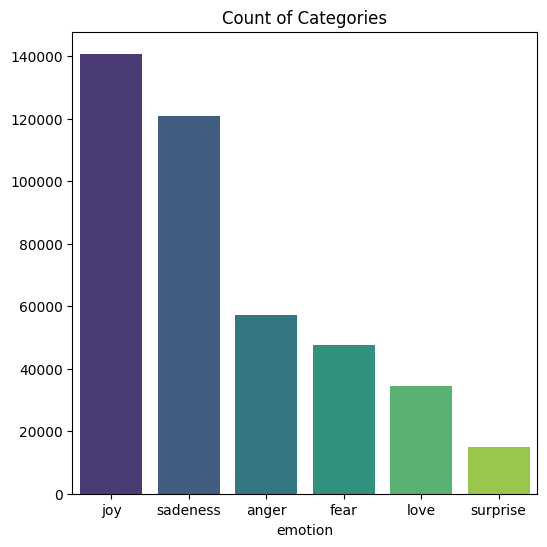

In [15]:
fig, axs = plt.subplots(figsize = (6, 6), facecolor='white')
palette = sns.color_palette("viridis")
sns.set_palette(palette)

sns.barplot(x=count.index, y=count.values, ax=axs, palette="viridis")
axs.set_title('Count of Categories')

In [16]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(text, test_size = 0.1, random_state = 111)

train_df.to_csv('train_data.csv', index = False)
test_df.to_csv('test_data.csv', index = False)

In [17]:
train_df

,text,label,emotion,rgb
148610,i feel very awkward about and have learned a l...,0,sadeness,#2C3E50
36755,i was already feeling disheartened and tired,0,sadeness,#2C3E50
414498,i was feeling lame,0,sadeness,#2C3E50
163370,i just have some residual feelings of chivalry...,0,sadeness,#2C3E50
395459,i feel uncertain about the next steps each day...,4,fear,#00008B
...,...,...,...,...
105747,i feel like the other idolises her friend it s...,1,joy,#FFCC00
102486,i am feeling this moment as gentle or there is...,2,love,#FFC0CB
135892,im not going to lie it makes me feel like hes ...,0,sadeness,#2C3E50
10196,im beginning to put my trust in you because i ...,1,joy,#FFCC00


# Data Cleansing

2. 텍스트 전처리
3. 토크나이즈
4. 데이터 정리
5. 레이블 인코딩 확인

In [18]:
!pip install transformers
!pip install faiss-cpu

In [19]:
!pip install accelerate

In [20]:
!pip install datasets

In [21]:
import transformers; transformers.__version__

'4.42.4'

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BitsAndBytesConfig, AutoModelForCausalLM
from datasets import Dataset
import torch
import os
import gc

In [23]:
try:
    import accelerate
except Exception as e:
    !pip install -q -U transformers
    !pip install -q datasets accelerate
    !pip install -q lomo-optim

In [24]:
from huggingface_hub import notebook_login
notebook_login()

### 평가하기

In [25]:
!pip install evaluate

In [26]:
import evaluate

accuracy = evaluate.load("accuracy")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [27]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# Model Finetuning

In [25]:
!pip install peft seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 23.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=e0e22cea3ce2c170af3531e729ad26c26c91463838f31a0bcb0ee3f10e2e6ea1
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [28]:
from datasets import load_dataset
from transformers import (
    AutoModelForTokenClassification,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    DataCollatorForTokenClassification,
    TrainingArguments,
    Trainer,
)
from peft import get_peft_config, PeftModel, PeftConfig, get_peft_model, LoraConfig, TaskType
import evaluate
import torch
import numpy as np

In [29]:
seqeval = evaluate.load("seqeval")

In [30]:
label_list = [
    "sadeness",
    "joy",
    "love",
    "anger",
    "fear",
    "surprise",
]

# html_rgb = {0: '#2C3E50', 1: '#FFCC00', 2: '#FFC0CB', 3: '#FF0000', 4: '#00008B', 5: '#FFFF00'}

# id6label = {0: 'sadeness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
# label6id = {'sadeness': 1, 'joy': 2, 'love': 3, 'anger': 3, 'fear': 4, 'surprise': 5}

In [ ]:
# def compute_metrics(p):
#     predictions, labels = p
#     predictions = np.argmax(predictions, axis=2)

#     true_predictions = [
#         [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
#         for prediction, label in zip(predictions, labels)
#     ]
#     true_labels = [
#         [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
#         for prediction, label in zip(predictions, labels)
#     ]

#     results = seqeval.compute(predictions=true_predictions, references=true_labels)
#     return {
#         "precision": results["overall_precision"],
#         "recall": results["overall_recall"],
#         "f1": results["overall_f1"],
#         "accuracy": results["overall_accuracy"],
#     }

In [ ]:
# train_df = train_df.sample(frac=0.1)
# test_df = test_df.sample(frac=0.1)

## Preprocess dataset

In [31]:
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b")

In [ ]:
|# def tokenize_and_align_labels(examples):
#     tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

#     labels = []
#     for i, label in enumerate(examples[f"tags"]):
#         word_ids = tokenized_inputs.word_ids(batch_index=i)
#         previous_word_idx = None
#         label_ids = []
#         for word_idx in word_ids:
#             if word_idx is None:
#                 label_ids.append(-100)
#             elif word_idx != previous_word_idx:
#                 label_ids.append(label[word_idx])
#             else:
#                 label_ids.append(-100)
#             previous_word_idx = word_idx
#         labels.append(label_ids)

#     tokenized_inputs["labels"] = labels
#     return tokenized_inputs

In [ ]:
# tokenized_text = text.map(tokenize_and_align_labels, batched=True)

In [32]:
# 단어 단위로 토크나이즈 하는 경우 사용
# from transformers import DataCollatorForTokenClassification

# data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

# 문장 단위로 토크나이즈 하는 경우
from transformers import DataCollatorWithPadding

# 시퀀스 분류를 위한 데이터 콜레이터 사용
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [33]:
id6label = {0: 'sadeness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
label6id = {'sadeness': 1, 'joy': 2, 'love': 3, 'anger': 3, 'fear': 4, 'surprise': 5}

model = AutoModelForSequenceClassification.from_pretrained(
    "google/gemma-2-2b", num_labels=6, id2label=id6label, label2id=label6id
)

# AutoModelForTokenClassification: 단어 단위로 토크나이즈 할 때
# AutoModelForSequenceClassification: 문장(시퀀스) 단위로 토크나이즈 할 때

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of Gemma2ForSequenceClassification were not initialized from the model checkpoint at google/gemma-2-2b and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
peft_config = LoraConfig(
    task_type=TaskType.TOKEN_CLS, target_modules=["self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj", "self_attn.o_proj"], inference_mode=False, r=16, lora_alpha=16, lora_dropout=0.1, bias="all"
)

In [35]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 6,403,584 || all params: 2,620,759,296 || trainable%: 0.2443


In [36]:
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()

In [37]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [38]:
#hugging face dataset으로 변환
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

In [39]:
# 토큰 단위로 사용할 때, mapping 추가
# train_dataset = train_dataset.map(lambda examples: {'labels': [examples['labels']]})
# test_dataset = test_dataset.map(lambda examples: {'labels': [examples['labels']]})

In [40]:
train_dataset["labels"][:5]

[0, 0, 0, 0, 4]

In [41]:
model.gradient_checkpointing_enable()  # 모델의 gradient checkpointing 활성화

In [42]:
!nvidia-smi

Sat Sep 21 14:22:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [47]:
train_dataset.info

DatasetInfo(description='', citation='', homepage='', license='', features={'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}, post_processed=None, supervised_keys=None, builder_name=None, dataset_name=None, config_name=None, version=None, splits=None, download_checksums=None, download_size=None, post_processing_size=None, dataset_size=None, size_in_bytes=None)

In [43]:
import random

# 전체 데이터셋의 10% 인덱스 샘플링
train_total_size = len(train_dataset)
train_sample_size = int(train_total_size * 0.01)  # 1%만 샘플링
train_random_indices = random.sample(range(train_total_size), train_sample_size)

# 10% 샘플링된 데이터셋 생성
sampled_train_dataset = train_dataset.select(train_random_indices)

test_total_size = len(test_dataset)
test_sample_size = int(test_total_size * 0.01)  # 1%만 샘플링
test_random_indices = random.sample(range(test_total_size), test_sample_size)

# 10% 샘플링된 데이터셋 생성
sampled_test_dataset = test_dataset.select(test_random_indices)

In [81]:
# train_sample = train_dataset.sample(frac=0.1)
# test_sample = train_dataset.sample(frac=0.1)

In [44]:
# 토큰 단위로 쓰는 경우 평가지표
# def compute_metrics(p):
#     predictions = p.predictions.argmax(-1)  # 예측값을 클래스 예측으로 변환
#     labels = p.label_ids
#     # -100으로 마스킹된 레이블 무시
#     valid_labels = labels[labels != -100]
#     valid_preds = predictions[labels != -100]
#     return {"accuracy": (valid_preds == valid_labels).mean()}

# 시퀀스 단위로 사용하는 경우 평가지표
def compute_metrics(p):
    predictions = p.predictions.argmax(-1)  # 시퀀스 레벨 예측
    labels = p.label_ids
    return {"accuracy": (predictions == labels).mean()}  # 전체 문장 단위 정확도


In [45]:
training_args = TrainingArguments(
    output_dir="result",
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=1,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=sampled_train_dataset,
    eval_dataset=sampled_test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print(f"train data set shape: {sampled_train_dataset.shape}")
print(f"test data set shape: {sampled_test_dataset.shape}")

trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


train data set shape: (3745, 3)
test data set shape: (416, 3)


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.000000,nan,0.314904


TrainOutput(global_step=3745, training_loss=0.0, metrics={'train_runtime': 1081.2618, 'train_samples_per_second': 3.464, 'train_steps_per_second': 3.464, 'total_flos': 8259956014302720.0, 'train_loss': 0.0, 'epoch': 1.0})

In [54]:
from transformers import pipeline

text = "This was a masterpiece. wow"

classifier = pipeline("sentiment-analysis", model="/content/result/checkpoint-3745")
classifier(text)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of Gemma2ForSequenceClassification were not initialized from the model checkpoint at google/gemma-2-2b and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.9528529047966003}]

In [59]:
html_rgb = {0: '#2C3E50', 1: '#FFCC00', 2: '#FFC0CB', 3: '#FF0000', 4: '#00008B', 5: '#FFFF00'}

In [61]:
def classify_emotion(text):
    result = classifier(text)
    label_index = int(result[0]['label'].split('_')[1])
    emotion_label = id6label[label_index]
    rgb_code = html_rgb[label_index]
    return {"emotion": emotion_label, "rgb": rgb_code,"score": result[0]['score']}

In [62]:
output = classify_emotion(text)
print(output)

{'emotion': 'joy', 'rgb': '#FFCC00', 'score': 0.9528529047966003}


In [47]:
# 단어 단위 output
# import torch

# def predict_emotion(text, model, tokenizer):
#     # 1. 입력 텍스트 토큰화
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(model.device)

#     # 2. 모델에 입력 전달
#     with torch.no_grad():
#         outputs = model(**inputs)

#     # 3. 출력 해석 (logits를 argmax로 레이블 추출)
#     predictions = torch.argmax(outputs.logits, dim=-1)

#     # 4. 예측된 레이블을 사람이 읽을 수 있는 레이블로 변환
#     predicted_labels = [id6label[int(pred)] for pred in predictions[0]]

#     return predicted_labels

# # 예시 텍스트
# text = "This was a masterpiece. wow"

# # 모델을 사용하여 감정 예측
# predicted_emotions = predict_emotion(text, model, tokenizer)
# print(f"Predicted emotions: {predicted_emotions}")

Predicted emotions: ['sadeness', 'sadeness', 'sadeness', 'sadeness', 'sadeness', 'sadeness', 'sadeness']


In [43]:
#text에 pdf가 들어가야하고, pdf를 읽을 때는 한 페이지씩 끊어서 들어가야함
#한 페이지를 읽는 방법도 정의할 필요가 있어보임. 페이지를 한 문장으로 요약해서 색깔을 만들것 인지, 페이지 문장 전체를 읽고 평균값으로 색깔을 만들것인지
#pdf
#색깔은 처음 데이터 전처리할 때, label에 색깔(RGB code)을 부여하거나.. 그런 식으로 진행해야할듯
#한 페이지에서
#

In [ ]:
#-> RGB